In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
file_dist = open('../log/100k_500_5e-4_32x32/LOG_vec_inter_dist.txt', 'r')
file_no_dist = open('../log/100k_500_5e-4_32x32/LOG_vec_inter.txt', 'r')

In [18]:
def read_reward_from_line(line):
    words = line.split()
    reward = words[6]
    
    return float(reward)

def read_mean_rewards_from_file(file, steps_one_iter):
    lines = file.readlines()
    mean_rewards = []
    i = 0
    sum = 0
    for line in lines:
        reward = read_reward_from_line(line)
        sum += reward
        i += 1

        if i % steps_one_iter == 0:
            mean_rewards.append(sum / steps_one_iter)
            sum = 0

    return mean_rewards

In [20]:
steps_one_iter = 500
mean_rewards_dist = read_mean_rewards_from_file(file_dist, steps_one_iter)
mean_rewards_no_dist = read_mean_rewards_from_file(file_no_dist, steps_one_iter)

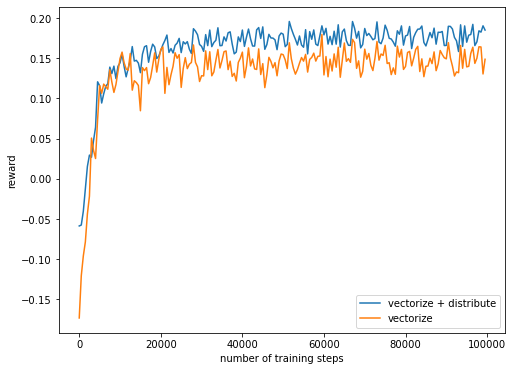

In [24]:
steps = range(1, steps_one_iter * len(mean_rewards), steps_one_iter)

plt.figure(figsize=(8,6))
plt.plot(steps, mean_rewards_dist, label='vectorize + distribute')
plt.plot(steps, mean_rewards_no_dist, label='vectorize')
plt.xlabel('number of training steps')
plt.ylabel('reward')
plt.legend()
plt.savefig('./100k_500_5e-4_32x32/LOG_vec_inter_dist.png')
plt.show()

In [36]:
mean_rewards_dist[103]

0.19577257529543265

In [37]:
mean_rewards_no_dist[119]

0.17958386114743335

In [30]:
np.argmax(mean_rewards_no_dist)

119

In [32]:
np.argmax(mean_rewards_dist)

103